<a href="https://colab.research.google.com/github/Iulia2701/proiecte_comune/blob/main/proiect2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💬Introducere**

*Spotify a lansat un concurs de modele de Machine Learning care trebuie să predicteze popularitatea cântecelor noi apărute pe piață. Acest model va ajuta compania să-și îmbunătățească sistemul de recomandare a cântecelor pentru clienții săi.*

Noi, echipa ***SpotyPy*** vom analiza în continuare setul de date și vom crea cele mai veridice modele. welcome to our project!

Vor fi studiate următoarele calități ale cântecelor:

*   acousticness - probabilitatea ca track-ul a acustic (de la 0 la 1)
*   danceability - cat de potrivit e cantecul pentru dans (de la 0 la 1)
*   duration_ms - durata cantecului in milisecunde
*   energy - energia track-ului, reprezentata de viteza, volum, dinamica (de la 0 la 1)
*   explicit - prezenta continutului explicit (necenzurat), (0 - absenta, 1 - prezenta)
*   instrumentalness - tendinta track-ului de a fi pur instrumental (dde la 0 la 1)
*   key - tonalitatea melodiei
*   

# **📊Lucram cu baza de date**

Importăm librăriile necesare:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Citirea documentului CSV**

Am salvat CSV-ul pe drive, apo îl citim de acolo:

In [ ]:
train =  pd.read_csv('https://drive.google.com/uc?export=download&id=1WPJ5atvroRikmTyS512dg_c3PPKuriFH')
train.head()

## **Curatirea datelor**

### **Datele lipsa**

Cautam cate date lipsa sunt in fiecare coloana:

In [ ]:
train.isnull().sum()

ID                  0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
popularity          0
dtype: int64

Am observat analizand dataFrame-ul ca unele cantece au tempoul 0. Am decis sa analizam cauzele si sa inlaturam cantecele in care aceasta informatie e eronata. 

In [ ]:
train_w = train['tempo'] ==0
train_top_r=train[train_w]
train_top_r

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
99,56768,0.297,['Patricia St. John'],0.0,120900,0.370000,0,0.000004,9,0.4010,-13.133,1,Kapitel 88 - Hamid und Kinza,1955,0.0,0.0,0.0,1955,0
164,23862,0.872,['Granular'],0.0,104516,0.000020,0,1.000000,1,0.0954,-27.194,1,White Noise - BP 228 hz,2017-10-14,0.0,0.0,0.0,2017,6
195,69985,0.112,"['Spa', 'Spa, Relaxation and Dreams', 'Relax M...",0.0,72652,0.000020,0,0.331000,9,0.6630,-8.327,1,Clean White Noise,2014-10-08,0.0,0.0,0.0,2014,5
777,31894,0.420,['Granular'],0.0,180656,0.001720,0,0.399000,4,0.1100,-27.848,0,Pink Noise - BP 240 hz,2017-11-24,0.0,0.0,0.0,2017,6
979,39706,0.745,['Natural White Noise Relaxation'],0.0,178013,0.000599,0,0.998000,8,0.1390,-18.318,0,Soothing White and Brown Noise: Sounds for Get...,2015-02-19,0.0,0.0,0.0,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113220,162730,0.951,"['Igor Stravinsky', 'Columbia Symphony Orchest...",0.0,63373,0.126000,0,0.689000,8,0.6080,-16.260,1,L'Oiseau de feu: Dialogue de Kachtchei avec Iv...,1948,0.0,0.0,0.0,1948,0
114903,82409,0.842,['Louis Armstrong'],0.0,147000,0.405000,0,0.001140,0,0.1980,-9.935,1,"Hello, Dolly!",1964-10-25,0.0,0.0,0.0,1964,6
116478,100483,0.943,['Jean Ritchie'],0.0,95253,0.030800,0,0.000000,9,0.1430,-22.440,1,One Morning in May - Another Version,1952,0.0,0.0,0.0,1952,1
117163,169770,0.957,['Granular'],0.0,146061,0.148000,0,0.168000,5,0.1120,-22.012,1,Brown Noise 750 LPF,2019-01-11,0.0,0.0,0.0,2019,7


Avem 103 cantece cu tempoul 0, dar unele sunt cantece speciale, asa numitele 'white noises'. Vom fac diferenta dintre ele.

In [ ]:
white_noises=train_top_r[train_top_r['name'].str.contains("Noise")]
white_noises.shape[0]

31

Avem 31 de cantece care au tempoul 0 special. Celelate le consideram date eronate. 

In [ ]:
bad_stuff=pd.concat([train_top_r, white_noises]).drop_duplicates(keep=False)
bad_stuff.shape[0]


72

Avem doar 72 de cantece cu date eronate, le putem sterge fara a pierde date statistice importante.

In [ ]:
train.shape[0]

118936

In [ ]:
train=pd.concat([train, bad_stuff]).drop_duplicates(keep=False)
train.shape[0]

118864

Astfel, am extras 72 de cantece cu erori la indicarea tempoului, si am ramas cu 118864 de cantece. 

### **Duplicate**

Aflăm întâi câte coloane și rânduri sunt în DataFrame-ul nostru:

In [ ]:
train.shape

(118864, 19)

Cercetam coloanele pe care le avem:

In [ ]:
train.columns

Index(['ID', 'acousticness', 'artists', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'release_date', 'speechiness', 'tempo', 'valence',
       'year', 'popularity'],
      dtype='object')

In [ ]:
train[train.duplicated(keep=False)]

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity


💡Nu avem duplicate la momentul dat.

**Cautam duplicate, dar cu id diferit:**

In [ ]:
train_x=train.loc[:, "acousticness":"popularity"]

In [ ]:
train_x_duplicat=train_x[train_x.duplicated(keep='first')]
train_x_duplicat

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
6184,0.995,"['Sergei Rachmaninoff', 'William Kapell', 'Fri...",0.217,95773,0.0887,0,0.909000,6,0.1000,-25.614,1,"Rhapsody on a Theme of Paganini, Op.43: Variat...",1945,0.0362,131.292,0.0467,1945,0
6793,0.562,['Charlie Chaplin'],0.203,570203,0.4180,0,0.837000,11,0.1030,-6.824,1,Money for the Girl / The Flower Shop,1931,0.0392,89.150,0.1820,1931,0
10290,0.977,"['Giuseppe Verdi', 'Mario Rossi', 'Orchestra S...",0.398,304133,0.1190,0,0.000009,1,0.3560,-19.864,1,"Verdi : Luisa Miller : Act 3 ""La tomba è un le...",1951,0.0967,97.116,0.1020,1951,0
12402,0.994,"['Frédéric Chopin', 'William Kapell']",0.401,170160,0.2090,0,0.889000,8,0.0907,-19.496,1,"Mazurka, Op.50, No. 2 in A-Flat",1945,0.0312,130.725,0.1190,1945,0
12575,0.882,"['Giuseppe Verdi', 'Mario Rossi', 'Orchestra S...",0.560,68507,0.0734,0,0.008330,2,0.1370,-25.874,1,Verdi : Luisa Miller : Act 1 Introduzione [Orc...,1951,0.1820,133.706,0.1520,1951,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118375,0.176,['The Who'],0.743,135122,0.4550,0,0.000296,7,0.1020,-9.633,0,Eyesight To The Blind (The Hawker),1969-05-23,0.0389,112.524,0.4510,1969,3
118511,0.964,"['Franz Lehár', 'Elisabeth Schwarzkopf', 'Otto...",0.343,208120,0.1910,0,0.000003,7,0.1700,-16.130,1,"Die Lustige Witwe (2001 - Remaster), Act II: E...",1953,0.0702,172.087,0.3470,1953,0
118526,0.828,['Igor Stravinsky'],0.712,148040,0.0768,0,0.682000,7,0.0997,-27.356,1,The Soldier's Tale Suite: II. Airs by a Stream,1948,0.0522,101.321,0.5600,1948,0
118797,0.889,"['Pyotr Ilyich Tchaikovsky', 'André Previn', '...",0.189,400493,0.3490,0,0.806000,11,0.3500,-16.035,1,"Swan Lake, Op.20, Act IV: 29. Finale (Andante ...",1976,0.0435,135.340,0.0722,1976,3


Avem 453 de duplicate.

In [ ]:
train.shape

(118864, 19)


Deci, am avut 118864 elemente in total.

In [ ]:
train_x_duplicat.shape

(453, 18)

453 de elemente s-au dovedit a fi duplicate. Ele vor fi scoase din DataFrame.

In [ ]:
train.drop_duplicates(subset=['acousticness', 'artists', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'release_date', 'speechiness', 'tempo', 'valence',
       'year', 'popularity'], inplace=True)
train.shape

(118411, 19)

Au ramas 118411 elemente unice.

În continuare lucrăm cu dataframe-ul train.

### **Corectitudinea datelor:**

Scoatem caracterele speciale de la coloana 'artists':

In [ ]:
train["artists"]=train["artists"].str.replace("\['","")
train["artists"]=train["artists"].str.replace("\']","")
train["artists"]=train["artists"].str.replace("\'","")
train["artists"]=train["artists"].str.replace("$","S")


In [ ]:
train

Acum coloana 'artists' arata bine. 

## **Analiza datelor**

Investigam ce tipuri de date avem in DataFrame.

In [ ]:
train.dtypes

ID                    int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
popularity            int64
dtype: object

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118411 entries, 0 to 118935
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                118411 non-null  int64  
 1   acousticness      118411 non-null  float64
 2   artists           118411 non-null  object 
 3   danceability      118411 non-null  float64
 4   duration_ms       118411 non-null  int64  
 5   energy            118411 non-null  float64
 6   explicit          118411 non-null  int64  
 7   instrumentalness  118411 non-null  float64
 8   key               118411 non-null  int64  
 9   liveness          118411 non-null  float64
 10  loudness          118411 non-null  float64
 11  mode              118411 non-null  int64  
 12  name              118411 non-null  object 
 13  release_date      118411 non-null  object 
 14  speechiness       118411 non-null  float64
 15  tempo             118411 non-null  float64
 16  valence           11

In continuare cercetam datele statistice oferite de functia describe() care ne vor ajuta la investigarea aspectelor bazei noastre de date.

In [ ]:
train.describe()

,ID,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
count,118411.000000,118411.000000,118411.000000,1.184110e+05,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000,118411.000000
mean,84865.484550,0.492636,0.538902,2.314912e+05,0.489099,0.085153,0.160679,5.199610,0.206502,-11.346134,0.708524,0.094166,117.004319,0.532976,1977.298925,3.149513
std,49053.103577,0.376464,0.174870,1.221084e+05,0.266876,0.279110,0.308260,3.514548,0.177067,5.626183,0.454444,0.150305,30.578375,0.261802,25.549030,2.180223
min,1.000000,0.000000,0.000000,1.530700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-55.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.000000
25%,42422.500000,0.094500,0.418000,1.711730e+05,0.264000,0.000000,0.000000,2.000000,0.098200,-14.436000,0.000000,0.034900,93.538000,0.324000,1957.000000,1.000000
50%,84899.000000,0.492000,0.549000,2.086530e+05,0.481000,0.000000,0.000202,5.000000,0.135000,-10.456000,1.000000,0.045000,114.832000,0.545000,1978.000000,3.000000
75%,127265.500000,0.887000,0.668000,2.627870e+05,0.709000,0.000000,0.083800,8.000000,0.262000,-7.120000,1.000000,0.075300,135.695500,0.750000,1999.000000,5.000000
max,169908.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.968000,243.507000,1.000000,2020.000000,10.000000


# *****🚸Planul initial**

Idei pentru descrierea datelor(Iuliana):
1. statistica popularitatii pe ani (media popularitatii cantecelor aparute in fiecare an) //barh, histograma
**Aspect:** popularitate, ani
**Grafic:** bahr sau histograma

2. selectarea tuturor cantecelor cu popularitate maxima (de la 8 la 10) si evidentierea artistilor acestor cantece. Ar putea fi un grup relativ mic de artisti care detin topul
**Aspect:** artisti, popularitate
**Grafic:** ??

Ideile Valeriei:

1.   What is the range of tempo & duration that most popular songs commonly use?
**Aspect:** tempo, duration, **Grafic:** scatter/kdeplot
2. What is the relationship between month of the year & valence in the most popular songs? 
**aspect:** date **Grafic:** ridgeplot

Ideile Paulei:

1. De care factori depinde popularitatea piesei?   
**Aspect:** popularity, daceability, energy, explicit content, loudness
**Grafic:** //mai bine nu bar
2.   ??



# **🏁Începem lucrul:**

# **1.Care este influența danceability și energy și  asupra popularity?**

**IPOTEZA :** Popularitatea este într-o oarecare măsură influențată de una dintre următoarele valori: danceability, energy, duration_ms, instrumentalness.

Text(0.5, 1.0, 'Dependența popularity de energy')

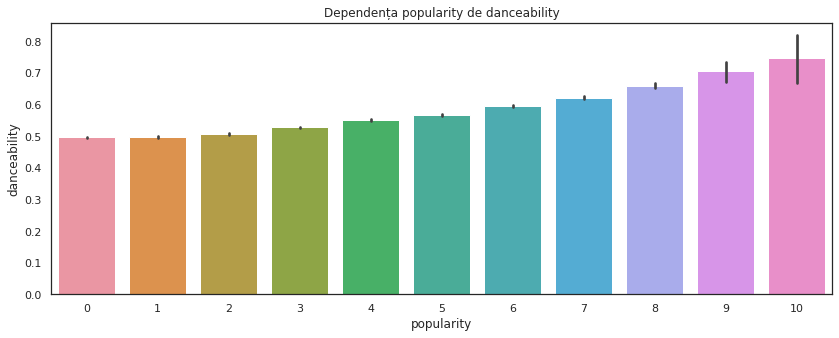

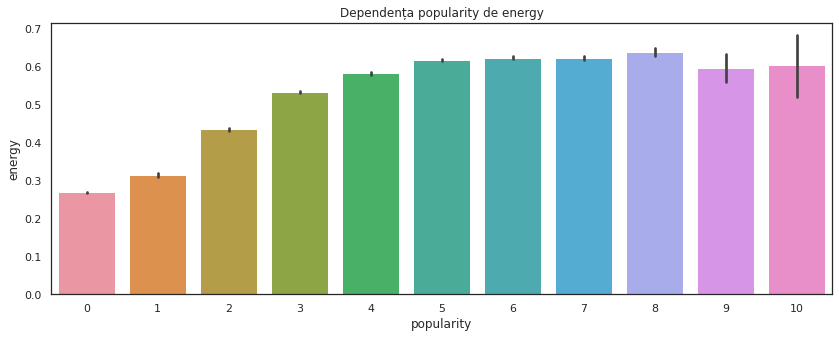

In [ ]:
plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['danceability'])
plt.title('Dependența popularity de danceability')

plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['energy'])
plt.title('Dependența popularity de energy')



In [ ]:
train.head(3)

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
0,53876,0.4470,Sister Nancy,0.759,199480,0.530,0,0.0113,8,0.0794,-8.023,1,Ain't No Stopping Nancy,2002-03-15,0.4180,78.354,0.596,2002,4
1,92111,0.8280,Jimmy Smith,0.714,483093,0.367,0,0.3990,5,0.1120,-12.855,1,Back At The Chicken Shack,1963-02-12,0.0328,107.328,0.633,1963,4
2,28869,0.0244,U2,0.380,347757,0.738,0,0.0229,8,0.4320,-10.737,1,Bullet The Blue Sky - Live,1987-03-03,0.0539,77.464,0.369,1987,4


Text(0.5, 1.0, 'Dependența popularity de duration_ms')

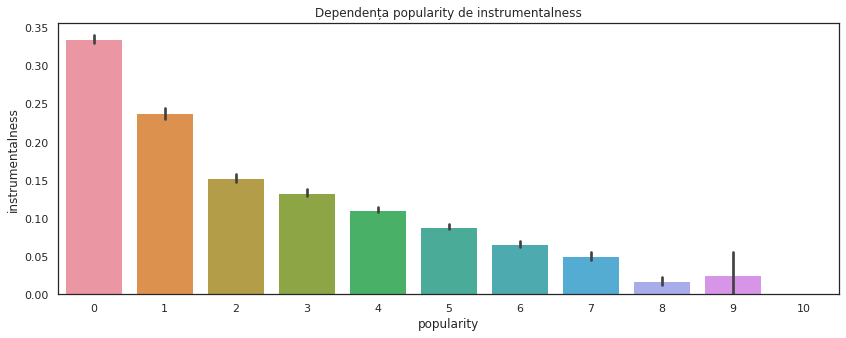

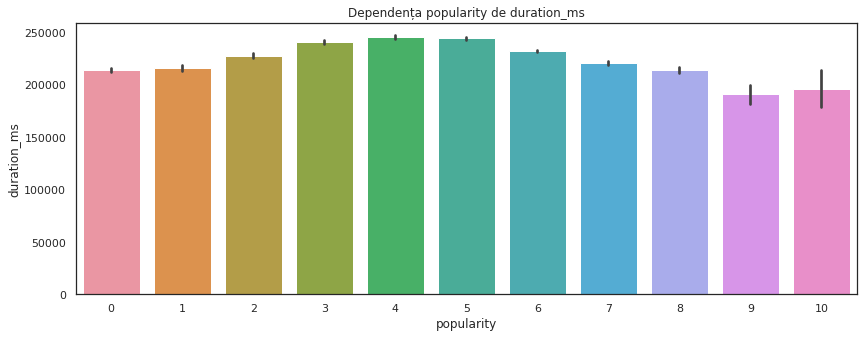

In [ ]:
plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['instrumentalness'])
plt.title('Dependența popularity de instrumentalness')

plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['duration_ms'])
plt.title('Dependența popularity de duration_ms')

**Concluzie :** În concluzie pot spune că cei mai importanți factori din cei analizați sunt : danceability și explicit, pe când cei lalți factori influențează întro mică măsură sau provoacă efectul invers.

# 2.Care este diferența dintre explicit de 0 și explicit de 1  ?

**Ipoteza:** Din cauza evoluției muzicii ascultătorii au nevoie de ceva mai deosebit în piesele ce le ascultă, astfel noile piese au tendința să folosească cuvinte necenzurate, ceea ce duce la creșterea popularității lor.

Text(0.5, 1.0, 'Dependența popularity de explicit de 1')

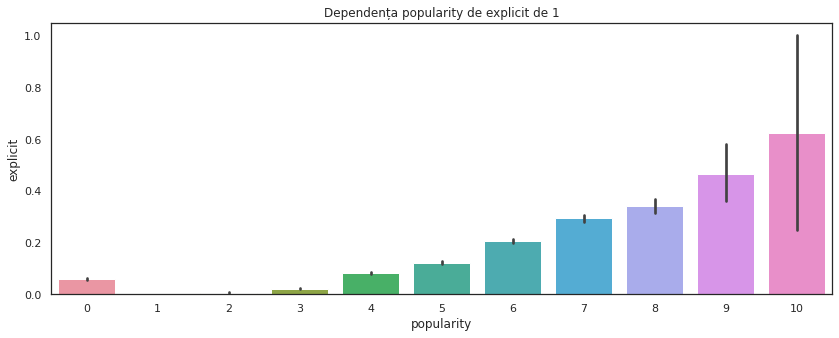

In [ ]:
plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['explicit']==1)
plt.title('Dependența popularity de explicit de 1')

Text(0.5, 1.0, 'Dependența popularity de explicit de 0')

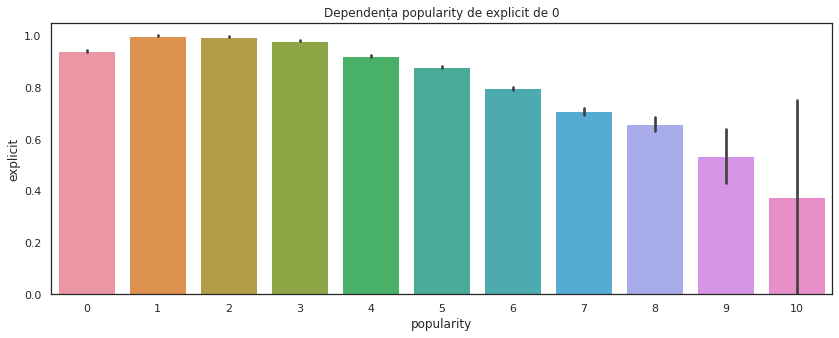

In [ ]:
plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=train['explicit']==0)
plt.title('Dependența popularity de explicit de 0')

**Concluzie:** Așa um evoluează domeniile, evoluează și muzica.astfel conținutul necenzurat devine din ce în ce mai cerut.

# **2.(Capitol aleatoriu, în parcurs de cercetare)'(capitolul Paulei)**

**speechiness **float - 
  **var_de_1 = train['speechiness'] >= 0,90  var_de_1_a = train[var_de_1]** - Speechiness detectează prezența cuvintelor rostite într-o piesă. Cu cât înregistrarea este mai exclusivizată ca vorbirea (de exemplu, talk-show, audio book, poezie), cu atât este mai aproape de 1.0 valoarea atributului.

 **var_0_66 = train['speechiness'] >= 0,66  var_0_66_a = train[var_0_66]**  Valorile de peste 0,66 descriu piese care sunt făcute probabil din cuvinte rostite. 
 
 **var_0_33_0_66 = train['speechiness'] > 0,33 and < 0,66  var_0_33_0_66_a = train[var_0_33_0_66]**  Valorile cuprinse între 0,33 și 0,66 descriu piese care pot conține atât muzică cât și vorbire, fie în secțiuni, fie în straturi, inclusiv cazuri precum muzica rap. 
 
** var_0_33_sub = train['speechiness'] <= 0,33  var_0_33_sub_a = train[var_0_33_sub] **  - Valorile sub 0,33 reprezintă cel mai probabil muzică și alte piese care nu vorbesc.

In [ ]:
train[['speechiness','popularity' ]]

,speechiness,popularity
0,0.4180,4
1,0.0328,4
2,0.0539,4
3,0.0397,0
4,0.0486,0
...,...,...
118931,0.0396,2
118932,0.0369,5
118933,0.0527,5
118934,0.0400,2


In [ ]:
var_de_1 = train['speechiness'] >= 0.90 
var_de_1_a = train[var_de_1]
var_de_1_a

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
63,55921,0.3430,Эрих Мария Ремарк,0.701,128400,0.1990,1,0.000003,6,0.0825,-18.226,1,Часть 21.2 - Триумфальная арка,1945,0.919,135.835,0.591,1945,0
196,71435,0.9310,Margaret Walker,0.727,79280,0.1270,0,0.000000,6,0.1690,-15.990,0,Stackalee,1954-01-01,0.927,119.650,0.396,1954,0
203,611,0.0793,Эрих Мария Ремарк,0.629,100319,0.2240,1,0.000017,5,0.0852,-20.863,1,Часть 190.3 & Часть 191.1 - Триумфальная арка,1945,0.947,164.932,0.579,1945,0
294,89151,0.9560,"Βασίλης Μεσολογγίτης, Μαρία Ανδρονίκου",0.715,101747,0.3640,0,0.000000,9,0.1840,-14.947,1,Αχ Μπριγκίτα!,1934-01-01,0.902,77.640,0.720,1934,0
313,144602,0.0103,Эрих Мария Ремарк,0.626,171606,0.1770,1,0.000000,8,0.3490,-21.444,1,Часть 116.2 & Часть 117 - На Западном фронте б...,1929,0.955,171.883,0.616,1929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118795,64044,0.9400,Solo on pan-pipes of thirteen tubes,0.674,68907,0.0439,0,0.000000,6,0.8050,-23.712,1,Fiesta Dance Music,1954-01-01,0.906,100.557,0.712,1954,0
118796,109225,0.1240,Эрих Мария Ремарк,0.715,108800,0.1470,1,0.000364,0,0.0931,-20.276,1,Часть 100.2 - Триумфальная арка,1945,0.929,126.562,0.639,1945,0
118798,153371,0.1440,Эрнест Хемингуэй,0.757,143300,0.1450,1,0.000000,11,0.1320,-16.295,0,Часть 84.3 - Зеленые холмы Африки,1935,0.916,120.046,0.772,1935,0
118819,98806,0.6480,"Sinclair Lewis, Frank Arnold",0.743,321320,0.1840,0,0.000000,2,0.2130,-19.604,1,"Das ist bei uns nicht möglich, Kapitel 124",1935,0.963,85.139,0.459,1935,0


In [ ]:
an =train.loc[train['speechiness'] >= 0.9]
an_x = an['speechiness']
an_x

63        0.919
196       0.927
203       0.947
294       0.902
313       0.955
          ...  
118795    0.906
118796    0.929
118798    0.916
118819    0.963
118922    0.953
Name: speechiness, Length: 2122, dtype: float64

Text(0.5, 1.0, 'Dependența popularity de duration_ms')

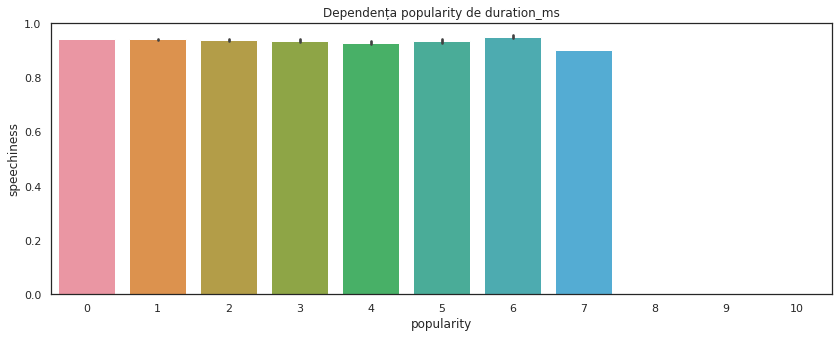

In [ ]:

plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y= an_x)
plt.title('Dependența popularity de duration_ms')


In [ ]:
an_1 =train.loc[train['speechiness'] <0.33]
an_x_1 = an['speechiness']
an_x_1

63        0.919
196       0.927
203       0.947
294       0.902
313       0.955
          ...  
118795    0.906
118796    0.929
118798    0.916
118819    0.963
118922    0.953
Name: speechiness, Length: 2122, dtype: float64

Text(0.5, 1.0, 'Dependența popularity de speechiness mai mic de 0,33')

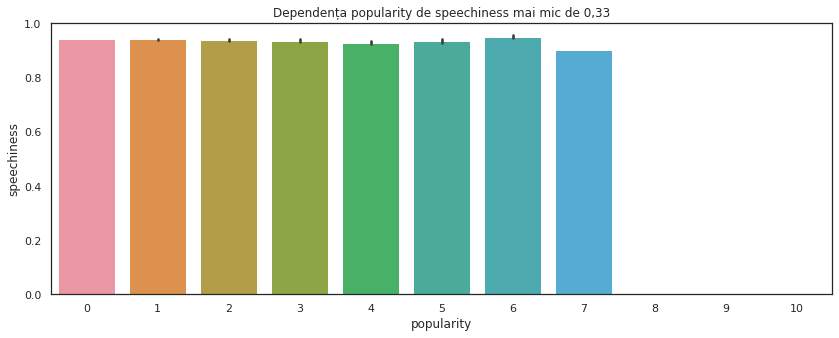

In [ ]:
# var_0_33_sub = train['speechiness'] <= 0,33
plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=an_x_1  )
plt.title('Dependența popularity de speechiness mai mic de 0,33')

In [ ]:

an = train.loc[(train['speechiness']>= 0.66) & (train['speechiness']< 0.90)]

plt.figure(figsize=(14, 5))
sns.set(style="white")
pop=sns.barplot(x=train['popularity'], y=an )
plt.title('Dependența popularity de duration_ms')

ValueError: ignored

<Figure size 1008x360 with 0 Axes>

#**3.TEMPO** & **DURATION**

Selectam cantecele cu popularitate 8 sau mai mare.

In [ ]:
train_top = train['popularity'] >=8
train_top_z=train[train_top]
train_top_z

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
154,87912,0.00929,Taylor Swift,0.771,171360,0.671,0,0.000000,2,0.0637,-5.617,1,You Need To Calm Down,2019-08-23,0.0553,85.026,0.714,2019,8
213,135443,0.03110,Dua Lipa,0.906,194607,0.474,0,0.000005,1,0.2860,-6.124,1,Pretty Please,2020-03-27,0.1940,106.977,0.654,2020,8
522,87591,0.16200,EDEN,0.413,218808,0.521,0,0.000000,9,0.3230,-4.469,1,sex (catching feelings),2016-08-19,0.0466,103.391,0.532,2016,8
635,97695,0.21000,Harry Styles,0.448,208907,0.838,0,0.000131,4,0.1310,-5.257,0,Golden,2019-12-13,0.0557,139.863,0.254,2019,8
650,97688,0.10900,"Trippie Redd, Juice WRLD, YNW Melly",0.687,199437,0.449,1,0.000000,2,0.2820,-10.061,1,6 Kiss,2019-11-22,0.1540,142.048,0.229,2019,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118569,55609,0.17900,"Imanbek, Martin Jensen",0.736,164885,0.657,1,0.000004,0,0.1180,-7.512,1,I'm Just Feelin' (Du Du Du),2020-05-01,0.0668,115.989,0.548,2020,8
118580,87922,0.01310,iann dior,0.630,131213,0.630,0,0.000000,9,0.1420,-6.211,1,emotions,2019-05-22,0.0395,80.512,0.163,2019,8
118673,126063,0.12700,Jack & Jack,0.700,182920,0.748,0,0.000000,1,0.0941,-6.044,1,No One Compares To You,2019-01-25,0.0434,111.939,0.631,2019,8
118806,87939,0.15200,"J Balvin, Bad Bunny",0.754,242573,0.646,0,0.000018,7,0.1080,-5.795,1,LA CANCIÓN,2019-06-28,0.3170,176.089,0.429,2019,8


In [ ]:
z=train_top_z['tempo'].value_counts().rename_axis('tempoul').reset_index(name='counts')
z

,tempoul,counts
0,0.000,4
1,120.006,3
2,100.026,3
3,102.040,2
4,104.980,2
...,...,...
1220,123.911,1
1221,116.971,1
1222,184.819,1
1223,143.772,1


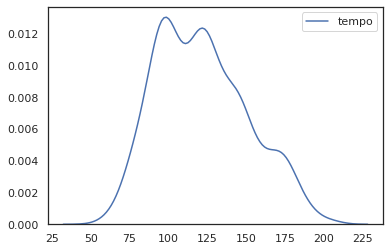

In [ ]:
ax=sns.kdeplot(train_top_z['tempo'], clip=(0, 250))

**Concluzie :** O caracteristica comuna a pieselor cu popularitate inalta este *Tempoul intre 83 si 133 bpm*

# **4.VALENCE & MONTH OF THE YEAR**

# **5.Cum depinde popularitatea de anul aparitiei piesei?**

Ipoteza: Cu cat piesa este mai noua, cu atat sansa ei a fi populara este mai mare. Piesele vechi aun un nivel scazut de popularitate.

Cautam cate piese au iesit in total in fiecare an: 

In [ ]:
total=train['year'].value_counts().rename_axis('year').reset_index(name='count')
total.sort_values(by=['year'], inplace=True)
total

,year,count
98,1921,77
99,1922,48
97,1923,118
96,1924,159
95,1925,194
...,...,...
49,2016,1389
31,2017,1397
33,2018,1396
53,2019,1384


Pentru a crea un grafic frumos, selectam din dataframe doar anii si popularitatea, dupa care impartim in 3 categorii:
1.  popularitate joasa - mai mica sau egala cu 3
2.  popularitate medie - intre 4 si 6 inclusiv
3.  popularitate inalta - 7 sau mai mare

In [ ]:
pop_x=train[['year', 'popularity']]
pop_x

,year,popularity
0,2002,4
1,1963,4
2,1987,4
3,1946,0
4,1955,0
...,...,...
118931,1957,2
118932,1984,5
118933,1984,5
118934,1959,2


Impartirea pe coloane aparte ne va ajuta la crearea unui format de date potrivit pentru grafic.

In [ ]:
pop_x.loc[pop_x['popularity']<=3, 'pop_cow']="low" 
pop_x.loc[pop_x['popularity']>3, 'pop_cow']=np.NaN 
pop_x.loc[(pop_x['popularity']>3)&(pop_x['popularity']<=6), 'pop_cam']="medium" 
pop_x.loc[(pop_x['popularity']<3)&(pop_x['popularity']>=6), 'pop_cam']=np.NaN 
pop_x.loc[(pop_x['popularity']>=7), 'pop_cgh']="high" 
pop_x.loc[pop_x['popularity']<7, 'pop_cgh']=np.NaN 
pop_x

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,popularity,pop_cow,pop_cam,pop_cgh
0,2002,4,NaN,medium,NaN
1,1963,4,NaN,medium,NaN
2,1987,4,NaN,medium,NaN
3,1946,0,low,NaN,NaN
4,1955,0,low,NaN,NaN
...,...,...,...,...,...
118931,1957,2,low,NaN,NaN
118932,1984,5,NaN,medium,NaN
118933,1984,5,NaN,medium,NaN
118934,1959,2,low,NaN,NaN


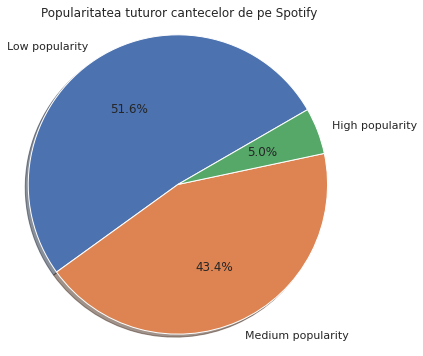

In [ ]:
data_for_pie=pop_x.count().rename_axis('year').reset_index(name='count')
low_pie=data_for_pie.iloc[2]['count']
medium_pie=data_for_pie.iloc[3]['count']
high_pie=data_for_pie.iloc[4]['count']
fig=plt.figure(figsize=(6,6))
labels='Low popularity', 'Medium popularity', 'High popularity'
sizes=[low_pie, medium_pie, high_pie]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=30)
plt.axis('equal')
plt.title('Popularitatea tuturor cantecelor de pe Spotify')
plt.show()

In [ ]:
low=pop_x[["year", "pop_cow"]]
medium=pop_x[["year", "pop_cam"]]
high=pop_x[["year", "pop_cgh"]]

In [ ]:
low.isnull()

,year,pop_cow
0,False,True
1,False,True
2,False,True
3,False,False
4,False,False
...,...,...
118931,False,False
118932,False,True
118933,False,True
118934,False,False


Cream 3 dataframe-uri, cate unul pentru cantece cu popularitate mica, medie si joasa. 

In [ ]:
low_notnull=low.dropna()
medium_notnull=medium.dropna()
high_notnull=high.dropna()

Pentru fiecare dintre cele 3 categorii vom face urmatoarea procedura:
*  numaram cate cantece sunt in fiecare an
*  le sortam dupa an
*  anii in care nu a iesit nici un cantec de o anumita popularitate s-au exclus din dataframe-uri, deci ii adaugam inapoi si punem 0 la nr de cantece

In [ ]:
low_fr=low_notnull['year'].value_counts().rename_axis('year').reset_index(name='counts')
low_fr.sort_values(by=['year'], inplace=True)
low_fr

,year,counts
77,1921,77
79,1922,48
75,1923,117
71,1924,159
68,1925,193
...,...,...
73,1998,119
80,1999,41
78,2000,49
81,2002,3


Adaugam anii care lipsesc.

In [ ]:
low_fr.index=low_fr['year']
new_low=low_fr.reindex(np.arange(low_fr.year.min(), low_fr.year.max()+1))
new_low['year']=new_low.index
new_low.fillna(0)

,year,counts
year,,
1921,1921,77.0
1922,1922,48.0
1923,1923,117.0
1924,1924,159.0
1925,1925,193.0
...,...,...
2016,2016,0.0
2017,2017,0.0
2018,2018,0.0


In [ ]:
medium_fr=medium_notnull['year'].value_counts().rename_axis('year').reset_index(name='counts')
medium_fr.sort_values(by=['year'], inplace=True)
medium_fr

,year,counts
86,1923,1
92,1925,1
80,1926,3
91,1927,1
78,1928,4
...,...,...
23,2016,1060
29,2017,824
37,2018,618
50,2019,417


In [ ]:
medium_fr.index=medium_fr['year']
new_medium=medium_fr.reindex(np.arange(1921, medium_fr.year.max()+1))
new_medium['year']=new_medium.index
new_medium.fillna(0)

,year,counts
year,,
1921,1921,0.0
1922,1922,0.0
1923,1923,1.0
1924,1924,0.0
1925,1925,1.0
...,...,...
2016,2016,1060.0
2017,2017,824.0
2018,2018,618.0


In [ ]:
high_fr=high_notnull['year'].value_counts().rename_axis('year').reset_index(name='counts')
high_fr.sort_values(by=['year'], inplace=True)
high_fr

,year,counts
64,1956,1
60,1957,2
59,1958,2
61,1959,1
63,1960,1
...,...,...
4,2016,329
3,2017,573
1,2018,778
0,2019,967


In [ ]:
high_fr.index=high_fr['year']
new_high=high_fr.reindex(np.arange(1921, high_fr.year.max()+1))
new_high['year']=new_high.index
new_high.fillna(0)

,year,counts
year,,
1921,1921,0.0
1922,1922,0.0
1923,1923,0.0
1924,1924,0.0
1925,1925,0.0
...,...,...
2016,2016,329.0
2017,2017,573.0
2018,2018,778.0


**Graficul**

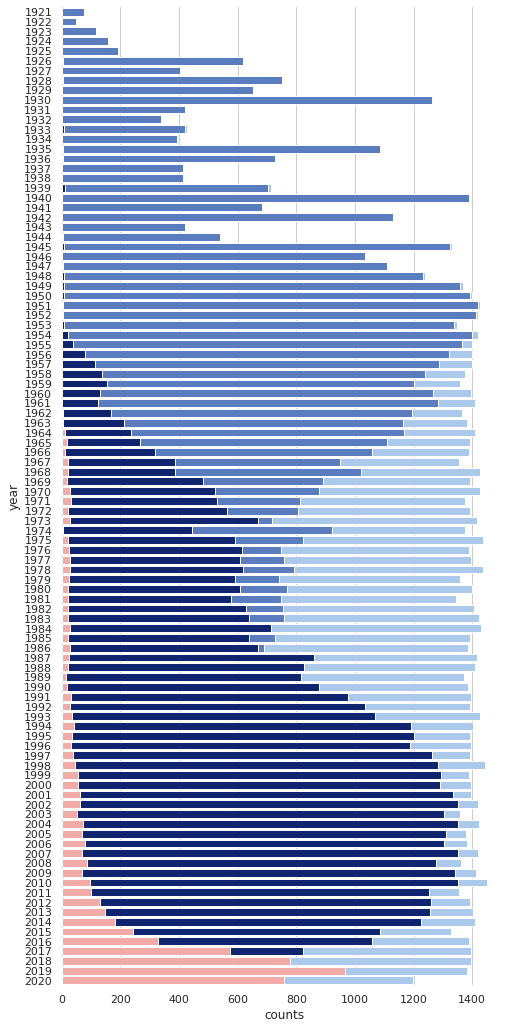

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 18))

sns.set_color_codes("pastel")
sns.barplot(x=total['count'], y=total['year'], label="Total", color="b", orient='h')
sns.set_color_codes("muted")
sns.barplot(x=new_low['counts'], y=new_low['year'], label="low", color="b", orient='h')
sns.set_color_codes("dark")
sns.barplot(x=new_medium['counts'], y=new_medium['year'], label="medium", color="b", orient='h')
sns.set_color_codes("pastel")
sns.barplot(x=new_high['counts'], y=new_high['year'], label="medium", color="r", orient='h')
sns.despine(left=True, bottom=True)

Concluzie: Cu cate mai recent a fost lansata piesa, cu atat popularitatea ei este mai mare. Incepand cu 1986 numarul pieselor cu popularitate mica a scazut considerabil, iar din 2017 majoritatea absoluta a pieselor au popularitate ridicata.

# **6. Care sunt artiștii care lansează cântece foarte populare în mod stabil?**

Ipoteza: o mare parte din cantecele cu popularitate mare apartin unui grup restrans de artisti.

Selectam din DataFrame cantecele cu popularitate de 7 si mai sus:

In [ ]:
train_top = train['popularity'] >=7
train_top_x=train[train_top]
train_top_x

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
14,55517,0.10900,"Matoma, MNEK, Kiana Ledé",0.764,160909,0.573,0,0.000000,6,0.3240,-4.385,1,Bruised Not Broken (feat. MNEK & Kiana Ledé),2019-06-14,0.0484,110.006,0.685,2019,7
53,40050,0.17800,"Koffee, Gunna",0.856,230151,0.721,0,0.000021,6,0.0913,-6.813,0,W (feat. Gunna),2019-11-26,0.0779,100.980,0.902,2019,7
64,135217,0.01570,Ruth B.,0.609,233720,0.692,0,0.000000,1,0.0864,-2.958,1,Dandelions,2017-05-05,0.0259,116.959,0.454,2017,7
81,116337,0.02310,Train,0.392,243253,0.825,0,0.000002,0,0.0972,-2.068,0,Play That Song,2017-01-27,0.0535,98.959,0.482,2017,7
154,87912,0.00929,Taylor Swift,0.771,171360,0.671,0,0.000000,2,0.0637,-5.617,1,You Need To Calm Down,2019-08-23,0.0553,85.026,0.714,2019,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118864,55591,0.08460,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,2020-05-29,0.0881,105.029,0.608,2020,7
118890,87313,0.03480,"Jason Derulo, 2 Chainz",0.760,177685,0.652,1,0.000000,6,0.3070,-7.321,1,Talk Dirty (feat. 2 Chainz),2013-09-10,0.2320,100.315,0.759,2013,7
118902,84654,0.02980,Starship,0.643,270333,0.801,0,0.000000,6,0.0719,-4.921,1,Nothing's Gonna Stop Us Now,1987-07-27,0.0228,95.988,0.534,1987,8
118910,84478,0.18900,U.S.A. For Africa,0.528,427333,0.447,0,0.000000,4,0.0745,-15.255,1,We Are The World,1985-01-01,0.0435,72.580,0.292,1985,7


In [ ]:
train_top_x.shape[0]


5926

Aflam cate cantece avem cu grad specific de popularitate:

In [ ]:
train_top_x['popularity'].value_counts()

7     4656
8     1176
9       86
10       8
Name: popularity, dtype: int64

In [ ]:
train_top_x.describe()

,ID,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
count,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000,5926.000000
mean,97619.449376,0.253409,0.630488,218768.498481,0.624151,0.306784,0.043306,5.196591,0.179262,-7.355866,0.637192,0.101389,120.987695,0.497762,2010.464394,7.231522
std,36109.486281,0.271448,0.166944,57034.776079,0.204233,0.461198,0.174075,3.578133,0.143375,4.362562,0.480851,0.102170,30.009179,0.238924,13.296603,0.463768
min,5085.000000,0.000002,0.000000,37640.000000,0.000020,0.000000,0.000000,0.000000,0.019000,-47.452000,0.000000,0.000000,0.000000,0.000000,1956.000000,7.000000
25%,85075.500000,0.033050,0.532000,184870.250000,0.499000,0.000000,0.000000,2.000000,0.094800,-8.442000,0.000000,0.037200,97.909250,0.318000,2008.000000,7.000000
50%,87999.500000,0.148000,0.649000,212900.000000,0.645000,0.000000,0.000000,5.000000,0.122000,-6.371500,1.000000,0.056350,119.993500,0.493000,2017.000000,7.000000
75%,116685.750000,0.394750,0.749000,243263.500000,0.775000,1.000000,0.000188,8.000000,0.214000,-4.870250,1.000000,0.120000,140.070250,0.683000,2019.000000,7.000000
max,169907.000000,0.996000,0.979000,811077.000000,1.000000,1.000000,1.000000,11.000000,0.984000,0.175000,1.000000,0.903000,220.099000,0.980000,2020.000000,10.000000


💡Observatii: majoritate cantecelor din lista celor mai populare au urmatoarele caracteristici:


*   acusticitate mica
*   dansabilitate mare
*   durata mica
*   nu sunt instrumentale
*   nu sunt inscrise live
*   au volum ridicat
*   au putine cuvinte
*   sunt din 2017 sau mai recent

Aceste observatii ar putea fi utile in studiul ulterior.





Din curiozitate, sa vedem care sunt cantecele cu popularitate maxima:

In [ ]:
train_top = train['popularity'] ==10
golden=train[train_top]
golden

,ID,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,year,popularity
48831,87840,0.10400,Roddy Ricch,0.896,196653,0.586,1,0.000000,10,0.7900,-6.687,0,The Box,2019-12-06,0.0559,116.971,0.642,2019,10
53417,87852,0.06860,"Surf Mesa, Emilee",0.674,176547,0.774,0,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),2019-11-26,0.0892,112.050,0.330,2019,10
55036,87949,0.73100,"Powfu, beabadoobee",0.726,173333,0.431,0,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,2020-02-08,0.1350,144.026,0.348,2020,10
66427,87946,0.32100,Drake,0.834,247059,0.454,1,0.000006,1,0.1140,-9.750,0,Toosie Slide,2020-04-03,0.2010,81.618,0.837,2020,10
74507,87940,0.24700,"DaBaby, Roddy Ricch",0.746,181733,0.690,1,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),2020-04-17,0.1640,89.977,0.497,2020,10
96092,87941,0.23300,"THE SCOTTS, Travis Scott, Kid Cudi",0.716,165978,0.537,1,0.000000,0,0.1570,-7.648,0,THE SCOTTS,2020-04-24,0.0514,129.979,0.280,2020,10
97256,87942,0.00146,The Weeknd,0.514,200040,0.730,0,0.000095,1,0.0897,-5.934,1,Blinding Lights,2020-03-20,0.0598,171.005,0.334,2020,10
104298,87844,0.30500,"BENEE, Gus Dapperton",0.863,223480,0.631,1,0.000030,7,0.1230,-4.689,1,Supalonely,2019-11-15,0.0534,128.977,0.817,2019,10


In continuare, calculam cate cantece are fiecare artist in DataFrame-ul cantecelor populare.

In [ ]:
y=train_top_x['artists'].value_counts().rename_axis('singers').reset_index(name='counts')
y

,singers,counts
0,BTS,56
1,One Direction,31
2,The Beatles,29
3,Lil Uzi Vert,29
4,Drake,28
...,...,...
3230,ABBA,1
3231,"Offset, Metro Boomin",1
3232,"Big Sean, E-40",1
3233,"Eminem, Royce Da 5\9"", Black Thought, Q-Tip, D...",1


Selectam doar artistii care au 15 sau mai multe piese populare, care ar garanta stabilitatea popularitatii:

In [ ]:
top_artist = y['counts'] >=15
best_singers=y[top_artist]
best_singers

,singers,counts
0,BTS,56
1,One Direction,31
2,The Beatles,29
3,Lil Uzi Vert,29
4,Drake,28
5,Eminem,28
6,Taylor Swift,26
7,The Weeknd,25
8,XXXTENTACION,25
9,Billie Eilish,24


Cream o vizualizare:

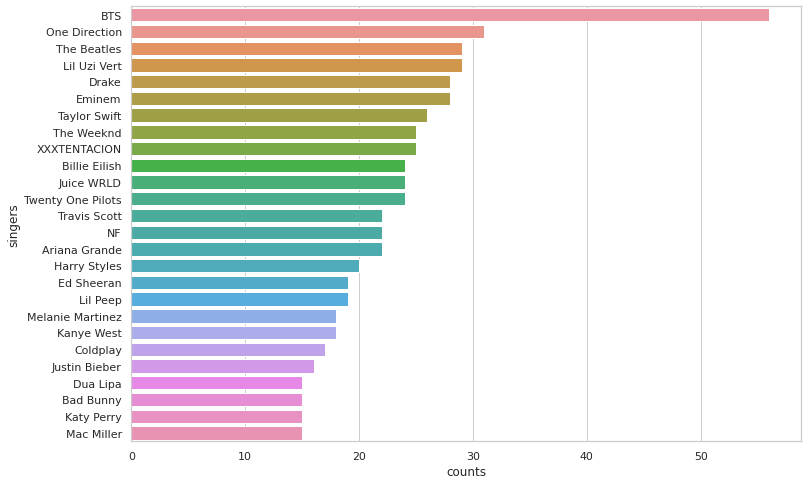

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax=sns.barplot(x=best_singers['counts'], y=best_singers['singers'])

Concluzie: Avem 26 de artisti care au 15 sau mai multe cantece cu o popularitate mare. Ipoteza s-a adeverit.